In [ ]:
# !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.5 MB/s eta 0:00:00
   ━━

In [1]:
import glob
import numpy as np
import pandas as pd
import re
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import pandas as pd

csv_data ="/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/gm_levels_1-6400_241111.csv"
# Define an empty list to store each chunk
chunks = []
chunk1 = pd.DataFrame()

# Load file in chunks of 100,000 rows at a time
for chunk in pd.read_csv(csv_data, chunksize=800):
    # Process each chunk here (optional)
    # chunks.append(chunk)
    chunk1 = chunk
    break

# Concatenate all chunks
# data = pd.concat(chunks, axis=0)

# data.head()

chunk1.head()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Load the dataset from Excel

# csv_data ="/content/drive/MyDrive/Colab Notebooks/winrate/gm_levels_1-6400.csv"
# lvls_gm_df = pd.read_csv(csv_data, index_col=0)

# # lvls_df['path'] = lvls_df['path']*lvls_df['Path']
# # lvls_df = lvls_df.drop(columns=['Path'])

# # columns_lower = lvls_df.columns.map(lambda x: x.lower())

# # lvls_df.columns = columns_lower

# lvls_gm_df.head()

In [4]:
chunk1.shape

# (800, 65972). (800, 28316). (800, 41412)


(800, 41412)

In [5]:
lvls_gm_df = chunk1.copy()

lvls_gm_df.columns,lvls_gm_df.shape

(Index(['Unnamed: 0.1', 'Unnamed: 0', 'Level', 'row1_rowValue_b',
        'row2_rowValue_b', 'row3_rowValue_b', 'row4_rowValue_b',
        'row5_rowValue_b', 'row6_rowValue_b', 'row7_rowValue_b',
        ...
        'zapperB72_zapperBValue_3', 'zapperB73_zapperBValue_3',
        'zapperB74_zapperBValue_3', 'zapperB75_zapperBValue_3',
        'zapperB76_zapperBValue_3', 'zapperB77_zapperBValue_3',
        'zapperB78_zapperBValue_3', 'zapperB79_zapperBValue_3',
        'zapperB80_zapperBValue_3', 'zapperB81_zapperBValue_3'],
       dtype='object', length=41412),
 (800, 41412))

In [6]:
lvls_gm_df.fillna(0, inplace=True)

lvls_gm_df.head()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
lvls_gm_df['Unnamed: 0.1']

,Unnamed: 0.1
0,0
1,1
2,2
3,3
4,4
...,...
795,795
796,796
797,797
798,798


In [12]:
lvls_gm_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
lvls_gm_df.shape

(800, 41410)

In [ ]:
# # n=0
# for i in range(81):
#   n =i
#   print(lvls_gm_df[lvls_gm_df['bones31'+str(n)+'_bones3Value_G']==1][['bones31'+str(n)+'_bones3Value_G','Level']])


In [13]:
# re.findall('^#.', lvls_gm_df.columns)
def find_pattern(pattern):
  unwanted_columns = []
  for col in lvls_gm_df.columns:
    if re.findall(pattern, col):
      unwanted_columns.append(col)
  return unwanted_columns


# unwanted_columns = []
# for col in lvls_gm_df.columns:
#   if re.findall('^#.', col):
#     unwanted_columns.append(col)

# len(unwanted_columns)

unwanted_columns_hash = find_pattern(pattern = '^#.')
len(unwanted_columns_hash)

0

In [ ]:
lvls_gm_df.drop(columns=unwanted_columns_hash, inplace=True)
lvls_gm_df.shape

(800, 58163)

In [14]:
unwanted_columns_slash = find_pattern(pattern = '^//.')
len(unwanted_columns_slash)

162

In [15]:
lvls_gm_df.drop(columns=unwanted_columns_slash, inplace=True)
lvls_gm_df.shape

(800, 41248)

In [21]:
lvls_gm_df.to_csv("/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/gm_levels_process_1-6400_241114.csv.csv")

In [16]:
# unwanted_dot_columns = []
# for col in lvls_gm_df.columns:
#   if re.findall(r'\w+\.', col):
#     unwanted_dot_columns.append(col)

# for col in unwanted_dot_columns[0:10]:
#   print(col)


unwanted_columns_dot = find_pattern(pattern = '\w+\.')
len(unwanted_columns_dot)

0

In [ ]:
lvls_gm_df.drop(columns=unwanted_columns_dot, inplace=True)

lvls_gm_df.shape

(800, 50257)

In [17]:
# prompt: write exp to find a word with last letter +

def find_words_with_last_letter_plus(df):
  """Finds columns in a DataFrame that end with '+'.

  Args:
    df: The pandas DataFrame to search in.

  Returns:
    A list of column names that end with '+'.
  """
  words_with_plus = []
  for column in df.columns:
    if column.endswith('+'):
      words_with_plus.append(column)
  return words_with_plus


unwanted_columns_plus = find_words_with_last_letter_plus(lvls_gm_df)
len(unwanted_columns_plus)

0

In [ ]:
# unwanted_columns_plus = find_pattern(pattern = 'w+$\+')
# len(unwanted_columns_plus)

In [ ]:
lvls_gm_df.drop(columns=unwanted_columns_plus, inplace=True)

lvls_gm_df.shape

(800, 49690)

In [18]:

unwanted_columns_in = find_pattern(pattern = '_inValue_')
len(unwanted_columns_in)

0

In [ ]:
unwanted_columns_in[0:100]

['in1_inValue_.',
 'in2_inValue_.',
 'in3_inValue_.',
 'in4_inValue_.',
 'in5_inValue_.',
 'in6_inValue_.',
 'in7_inValue_.',
 'in8_inValue_.',
 'in9_inValue_.',
 'in10_inValue_.',
 'in11_inValue_.',
 'in12_inValue_.',
 'in13_inValue_.',
 'in14_inValue_.',
 'in15_inValue_.',
 'in16_inValue_.',
 'in17_inValue_.',
 'in18_inValue_.',
 'in19_inValue_.',
 'in20_inValue_.',
 'in21_inValue_.',
 'in22_inValue_.',
 'in23_inValue_.',
 'in24_inValue_.',
 'in25_inValue_.',
 'in26_inValue_.',
 'in27_inValue_.',
 'in28_inValue_.',
 'in29_inValue_.',
 'in30_inValue_.',
 'in31_inValue_.',
 'in32_inValue_.',
 'in33_inValue_.',
 'in34_inValue_.',
 'in35_inValue_.',
 'in36_inValue_.',
 'in37_inValue_.',
 'in38_inValue_.',
 'in39_inValue_.',
 'in40_inValue_.',
 'in41_inValue_.',
 'in42_inValue_.',
 'in43_inValue_.',
 'in44_inValue_.',
 'in45_inValue_.',
 'in46_inValue_.',
 'in47_inValue_.',
 'in48_inValue_.',
 'in49_inValue_.',
 'in50_inValue_.',
 'in51_inValue_.',
 'in52_inValue_.',
 'in53_inValue_.',
 '

In [ ]:
# for col in unwanted_columns_in:
#   print(col, ':   ',lvls_gm_df[col].unique())

in1_inValue_. :    [nan]
in2_inValue_. :    [nan]
in3_inValue_. :    [nan]
in4_inValue_. :    [nan]
in5_inValue_. :    [nan]
in6_inValue_. :    [nan]
in7_inValue_. :    [nan]
in8_inValue_. :    [nan]
in9_inValue_. :    [nan]
in10_inValue_. :    [nan]
in11_inValue_. :    [nan]
in12_inValue_. :    [nan]
in13_inValue_. :    [nan]
in14_inValue_. :    [nan]
in15_inValue_. :    [nan]
in16_inValue_. :    [nan]
in17_inValue_. :    [nan]
in18_inValue_. :    [nan]
in19_inValue_. :    [nan]
in20_inValue_. :    [nan]
in21_inValue_. :    [nan]
in22_inValue_. :    [nan]
in23_inValue_. :    [nan]
in24_inValue_. :    [nan]
in25_inValue_. :    [nan]
in26_inValue_. :    [nan]
in27_inValue_. :    [nan]
in28_inValue_. :    [nan]
in29_inValue_. :    [nan]
in30_inValue_. :    [nan]
in31_inValue_. :    [nan]
in32_inValue_. :    [nan]
in33_inValue_. :    [nan]
in34_inValue_. :    [nan]
in35_inValue_. :    [nan]
in36_inValue_. :    [nan]
in37_inValue_. :    [nan]
in38_inValue_. :    [nan]
in39_inValue_. :    [

In [ ]:
lvls_gm_df['in10_inValue_a'].unique()

array([nan])

In [ ]:
lvls_gm_df[lvls_gm_df['in10_inValue_a'] != np.nan]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
lvls_gm_df.drop(columns=unwanted_columns_in, inplace=True)

lvls_gm_df.shape

(800, 40186)

In [ ]:
unwanted_columns_out = find_pattern(pattern = '_outValue_')
len(unwanted_columns_out)

0

In [ ]:
lvls_gm_df.drop(columns=unwanted_columns_out, inplace=True)

lvls_gm_df.shape

(800, 39169)

In [ ]:
65972 - 39574

26398

In [19]:
lvls_gm_df.head()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

# unwanted_columns_winkies = find_pattern(pattern = r'winkies')
# len(unwanted_columns_winkies)

In [20]:
def lower_last_letter(x):
  # return
  words = x.split('_')
  newx ='_'.join(words[:-1]) + '_' +  words[-1].lower()
  return newx

def upper_last_letter(x):
  # return
  words = x.split('_')
  newx ='_'.join(words[:-1]) + '_' +  words[-1].upper()
  return newx

lower_last_letter('sludge4_sludgeValue_X'), upper_last_letter('sludge4_sludgeValue_x')

('sludge4_sludgeValue_x', 'sludge4_sludgeValue_X')

In [ ]:
def remove_duplicated_pwup_columns(powerup_patter):
  # find powerup columns and append them to empty array
  unwanted_columns_pwup = find_pattern(pattern = powerup_patter )
  # for col in lvls_gm_df.columns:
  #   if re.findall(r"sludge\w*_[xX]$", col):
  #     unwanted_columns_sludge.append(col)

  # # check few column names
  # for col in unwanted_columns_sludge[0:10]:
  #   print(col)

  # create dataframe for a powerup
  pwup_df  = pd.DataFrame({'old':unwanted_columns_pwup})
  # lower case the last letter in column name and add to new column
  pwup_df['new'] = pwup_df['old'].map(lambda x : lower_last_letter(x))

  # find duplicates in new columns and create dup series
  dup = pwup_df['new'][pwup_df['new'].duplicated(keep=False)]

  # find total unique columns in the new column
  unique_sludge_col = pwup_df['new'].unique()
  # len(unique_sludge_col), len(set(unique_sludge_col))

  # find unique columns from dup series
  sludge_col_unique = list(set(dup))
  # len(sludge_col_unique)

  # convert to sets
  set1 = set(unique_sludge_col)
  set2 = set(sludge_col_unique)

  # find the difference between sets
  difference_col = set1.difference(set2)

  # create dataframe from unique column
  sludge_uniq_df = pd.DataFrame({'x':sludge_col_unique})
  # upper case the last letter in column name and add to new column
  sludge_uniq_df['X'] = sludge_uniq_df['x'].map(lambda x : upper_last_letter(x))

  #Store power columns to different df
  sludge_fin_df = lvls_gm_df[unwanted_columns_pwup]

  #remove those powerup  column
  lvls_gm_df.drop(columns=unwanted_columns_pwup, inplace=True)

  #create new column by adding 'x' and "X"
  for i in range(len(sludge_uniq_df['x'])):
    # print(i)
    lvls_gm_df[sludge_uniq_df['x'][i]] =(sludge_fin_df[sludge_uniq_df['x'][i]]).fillna(0).astype(int) + (sludge_fin_df[sludge_uniq_df['X'][i]] ).fillna(0).astype(int)

  #add non duplicated columns to level data frame
  difference_col2list = list(difference_col)
  for i in range(len(difference_col)):
    # print(i)
    lvls_gm_df[difference_col2list[i]] = sludge_fin_df[difference_col2list[i]].fillna(0).astype(int)

  # finally check the shape of level data
  print(lvls_gm_df.shape)


In [ ]:
# remove_duplicated_pwup_columns('_'+'bones1'+'Value_')

In [ ]:
# unwanted_columns_pwup = find_pattern(pattern = r'_'+'bones3'+'Value_' )
# len(unwanted_columns_pwup)

3564

In [ ]:
# create dataframe for a powerup
# pwup_df  = pd.DataFrame({'old':unwanted_columns_pwup})
# # lower case the last letter in column name and add to new column
# # pwup_df['new'] = pwup_df['old'].map(lambda x : lower_last_letter(x))

# pwup_df

,old
0,bones31_bones3Value_A
1,bones32_bones3Value_A
2,bones33_bones3Value_A
3,bones34_bones3Value_A
4,bones35_bones3Value_A
...,...
3559,bones377_bones3Value_L
3560,bones378_bones3Value_L
3561,bones379_bones3Value_L
3562,bones380_bones3Value_L


In [ ]:
# len(pwup_df['old'].unique()), len(pwup_df['new'].unique())

In [ ]:
# pwup_df['lower'] = pwup_df['old'].map(lambda x : 1 if (x.split('_')[-1]).islower() else 0)
# pwup_df

,old,lower
0,bones31_bones3Value_A,0
1,bones32_bones3Value_A,0
2,bones33_bones3Value_A,0
3,bones34_bones3Value_A,0
4,bones35_bones3Value_A,0
...,...,...
3559,bones377_bones3Value_L,0
3560,bones378_bones3Value_L,0
3561,bones379_bones3Value_L,0
3562,bones380_bones3Value_L,0


In [ ]:
# prompt: fix :pwup_df[[pwup_df['lower'] == True]]

# lower_col = pwup_df[pwup_df['lower'] == 1]['old'].unique()
# upper_col = pwup_df[pwup_df['lower'] == 0]['old'].unique()

# len (lower_col)+ len(upper_col)

3564

In [ ]:
# lvls_gm_df[['Level',lower_col[0],'bones31_bones3Value_A']]

,Level,bones31_bones3Value_a,bones31_bones3Value_A
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,0.0,0.0
...,...,...,...
795,796,0.0,0.0
796,797,0.0,0.0
797,798,0.0,0.0
798,799,0.0,0.0


In [ ]:
# pwup_df[(pwup_df['new'] =='bones3132_bones3Value_g')|(pwup_df['new'] =='bones3132_bones3Value_G')]

,old,new
1427,bones3132_bones3Value_G,bones3132_bones3Value_g


In [ ]:
pwup_df[1550:1600]

,old,new
1550,bones393_bones3Value_G,bones393_bones3Value_g
1551,bones394_bones3Value_G,bones394_bones3Value_g
1552,bones395_bones3Value_G,bones395_bones3Value_g
1553,bones396_bones3Value_G,bones396_bones3Value_g
1554,bones397_bones3Value_G,bones397_bones3Value_g
1555,bones398_bones3Value_G,bones398_bones3Value_g
1556,bones399_bones3Value_G,bones399_bones3Value_g
1557,bones3100_bones3Value_G,bones3100_bones3Value_g
1558,bones3101_bones3Value_G,bones3101_bones3Value_g
1559,bones3102_bones3Value_G,bones3102_bones3Value_g


In [ ]:
 # find duplicates in new columns and create dup series
# dup = pwup_df['new'][pwup_df['new'].duplicated(keep='first')].to_frame()
# dup

,new
1701,bones31_bones3Value_a
1702,bones32_bones3Value_a
1703,bones33_bones3Value_a
1704,bones34_bones3Value_a
1705,bones35_bones3Value_a
...,...
3559,bones377_bones3Value_l
3560,bones378_bones3Value_l
3561,bones379_bones3Value_l
3562,bones380_bones3Value_l


In [ ]:
# dup['new']

,new
1701,bones31_bones3Value_a
1702,bones32_bones3Value_a
1703,bones33_bones3Value_a
1704,bones34_bones3Value_a
1705,bones35_bones3Value_a
...,...
3559,bones377_bones3Value_l
3560,bones378_bones3Value_l
3561,bones379_bones3Value_l
3562,bones380_bones3Value_l


In [ ]:
# dup[dup['new'] =='bones3110_bones3Value_g']

,new


In [ ]:
# unique_sludge_col = pd.DataFrame({'uniq':pwup_df['new'].unique()})

# unique_sludge_col

,uniq
0,bones31_bones3Value_a
1,bones32_bones3Value_a
2,bones33_bones3Value_a
3,bones34_bones3Value_a
4,bones35_bones3Value_a
...,...
2587,bones377_bones3Value_z
2588,bones378_bones3Value_z
2589,bones379_bones3Value_z
2590,bones380_bones3Value_z


In [ ]:
# unique_sludge_col[unique_sludge_col['uniq'] =='bones3132_bones3Value_g']

,uniq
1427,bones3132_bones3Value_g


In [ ]:
for i in dup:
  # print(i)
  print(i, ':',lvls_gm_df[i].iloc[-1])


# lvls_gm_df[dup.iloc[0]]

bones31_bones3Value_a : 0.0
bones32_bones3Value_a : 0.0
bones33_bones3Value_a : 0.0
bones34_bones3Value_a : 0.0
bones35_bones3Value_a : 0.0
bones36_bones3Value_a : 0.0
bones37_bones3Value_a : 0.0
bones38_bones3Value_a : 0.0
bones39_bones3Value_a : 0.0
bones310_bones3Value_a : 0.0
bones311_bones3Value_a : 0.0
bones312_bones3Value_a : 0.0
bones313_bones3Value_a : 0.0
bones314_bones3Value_a : 0.0
bones315_bones3Value_a : 0.0
bones316_bones3Value_a : 0.0
bones317_bones3Value_a : 0.0
bones318_bones3Value_a : 0.0
bones319_bones3Value_a : 0.0
bones320_bones3Value_a : 0.0
bones321_bones3Value_a : 0.0
bones322_bones3Value_a : 0.0
bones323_bones3Value_a : 0.0
bones324_bones3Value_a : 0.0
bones325_bones3Value_a : 0.0
bones326_bones3Value_a : 0.0
bones327_bones3Value_a : 0.0
bones328_bones3Value_a : 0.0
bones329_bones3Value_a : 0.0
bones330_bones3Value_a : 0.0
bones331_bones3Value_a : 0.0
bones332_bones3Value_a : 0.0
bones333_bones3Value_a : 0.0
bones334_bones3Value_a : 0.0
bones335_bones3Value_a 

In [ ]:
lvls_gm_df[['Level','bones3110_bones3Value_G']]

,Level,bones3110_bones3Value_G
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
795,796,0.0
796,797,0.0
797,798,0.0
798,799,0.0


In [ ]:
3564-1944

1620

In [ ]:
len(pwup_df['old'].unique())

3564

In [ ]:
len(pwup_df['new'].unique())

2592

In [ ]:
3564-2592

972

In [ ]:
# remove_duplicated_pwup_columns('sludge')

In [ ]:
def check_duplication(powerup_patter, powerup):
  unwanted_columns_bone = find_pattern(pattern = powerup_patter )

  pwup_df = pd.DataFrame({'old':unwanted_columns_bone})
  pwup_df['new'] = pwup_df['old'].map(lambda x : lower_last_letter(x))

  dup_double =pwup_df['new'][pwup_df['new'].duplicated(keep=False)]
  # len(set(unwanted_columns_bone))
  # bone_col.size


  dup_single =pwup_df['new'][pwup_df['new'].duplicated(keep='first')]
  # len(set(unwanted_columns_bone))

  # print(bone_df.size)
  # print(bone_df['new'].iloc[0] if not bone_df['new'].empty else None)
  # print(bone_col.size)
  # print(bone_col1.size)

  # power_name count col_name duplicates uniq_in_duplicates
  dup_df = pd.DataFrame({
      'power_name': [powerup],
      'count': [pwup_df.size],
      'col_name': [pwup_df['new'].iloc[0] if not pwup_df['new'].empty else None],
      'duplicates': [dup_double.size],
      'uniq_in_duplicates': [dup_single.size],
  })

  return dup_df


In [ ]:
powerup='bones3'

check_duplication(r'_'+powerup+'Value_',powerup)

,power_name,count,col_name,duplicates,uniq_in_duplicates
0,bones3,1946,bones361_bones3Value_i,0,0


In [ ]:
'bones3132_bones3Value_g'.split('_')[-1].islower()

True

In [ ]:
remove_duplicated_pwup_columns(r'_'+'bones3'+'Value_')

KeyError: 'bones3132_bones3Value_g'

In [ ]:

def find_unique_columns():
  # create column dataframe
  col_df = pd.DataFrame({'col':lvls_gm_df.columns})
  # Remove 2 unwanted rows
  col_df = col_df.iloc[2:]

  # find only power up name
  col_df['new_col'] = col_df['col'].map(lambda x : x.split('_')[-2][0:-5])

  # find unique powerup to list
  unique_col_list = col_df['new_col'].unique()
  return unique_col_list

unique_pwup_list = find_unique_columns()

In [ ]:
unique_pwup_list

array(['row', 'power', 'seeker', 'crates', 'mud', 'marker', 'rocksA',
       'frost', 'smoke', 'growA', 'rocks', 'bones2', 'bones3', 'torches',
       'conveyor', 'sludge', 'scrates', 'boulder', 'boulderX', 'powerPot',
       'winkies', 'spread', 'firework', 'bones4', 'curtains', 'spawner',
       'rubySlippers', 'bush', 'munchkins1', 'super', 'fireball',
       'mining', 'bigMover', 'HelpRovers', 'HelpRoversD', 'torch',
       'firball', 'munchkins2', 'vswapblocker', 'hswapblocker', 'in',
       'out', 'zapperA', 'zapperB', 'zapperC', 'switch', 'gate', 'bloom',
       'munchkinegg', 'bouquet', 'ColorSwitch', 'block', 'snowball',
       'tower', 'towerX', 'bones1'], dtype=object)

In [ ]:
'seeker19_seekerValue_1'.split('_')[1][0:-5]

'seeker'

In [ ]:
pw_df = pd.DataFrame()
for powerup in unique_pwup_list:
  df = check_duplication('_'+powerup+'Value_',powerup)
  pw_df = pd.concat([pw_df, df], ignore_index=True)


pw_df


,power_name,count,col_name,duplicates,uniq_in_duplicates
0,row,5940,row1_rowValue_b,648,324
1,power,3420,power1_powerValue_v,0,0
2,seeker,2178,seeker1_seekerValue_1,0,0
3,crates,1638,crates1_cratesValue_1,0,0
4,mud,1458,mud1_mudValue_1,0,0
5,marker,324,marker1_markerValue_^,0,0
6,rocksA,1944,rocksA1_rocksAValue_1,0,0
7,frost,1296,frost1_frostValue_1,0,0
8,smoke,162,smoke1_smokeValue_x,0,0
9,growA,1278,growA1_growAValue_1,0,0


In [ ]:
dup_pw_df = pw_df[pw_df['uniq_in_duplicates']>0].iloc[1:]
dup_pw_df

,power_name,count,col_name,duplicates,uniq_in_duplicates
11,bones2,8100,bones21_bones2Value_a,2592,1296
12,bones3,7128,bones31_bones3Value_a,1944,972
13,torches,2916,torches1_torchesValue_d,1134,567
15,sludge,810,sludge1_sludgeValue_x,324,162
17,boulder,4050,boulder1_boulderValue_1,324,162
28,munchkins1,9238,munchkins11_munchkins1Value_a,2592,1296
38,vswapblocker,846,vswapblocker1_vswapblockerValue_1,180,90
39,hswapblocker,828,hswapblocker1_hswapblockerValue_1,160,80
40,in,2034,in1_inValue_a,162,81
41,out,2034,out1_outValue_i,162,81


In [ ]:
# lvls_gm_df['in1_inValue_a'].unique(), lvls_gm_df['out1_outValue_i'].unique()

In [ ]:
dup_pw_df['power_name']

,power_name
11,bones2
12,bones3
13,torches
15,sludge
17,boulder
28,munchkins1
38,vswapblocker
39,hswapblocker
40,in
41,out


In [ ]:
remove_duplicated_pwup_columns('_'+'gate'+'Value_')

(800, 28316)


In [ ]:
lvls_gm_df.shape

(800, 28316)

In [ ]:
lvls_gm_df.shape

(800, 41412)

In [ ]:
lvls_gm_df.head()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
lvls_gm_df[lvls_gm_df['row37_rowValue_+']==1]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# remove_duplicated_pwup_columns('bones1')


# for powerup in dup_pw_df['power_name']:
#   remove_duplicated_pwup_columns('_'+powerup+'Value_')

In [ ]:


lvls_gm_df['bones1133_bones1Value_h']

KeyError: 'bones1133_bones1Value_h'

In [ ]:
unwanted_columns_out = find_pattern(pattern = '_bones2Value_')
len(unwanted_columns_out)

4050

In [ ]:
# 81+162

In [ ]:
# dup_1 = sludge_df['new'][sludge_df['new'].duplicated(keep='first')]
# dup_1

In [ ]:
# 162+81

In [ ]:
# sludge_col = (set(unique_sludge_col)).difference - set(sludge_col_unique)
# len(sludge_col)

In [ ]:
# sludge_col_unique
# difference_col


In [ ]:
# lvls_gm_df['sludge243_sludgeValue_x'],lvls_gm_df['sludge243_sludgeValue_X']

In [ ]:
# sludge_col_unique

In [ ]:
# list(difference_col)[0]

In [ ]:
# sludge_fin_df[sludge_uniq_df['x'][0]].fillna(0).astype(int)

(800, 58001)

In [ ]:
# 65972 - 50257

15715

In [ ]:
# dup_1[dup_1 == 'sludge1_sludgeValue_x']
# dup[dup == 'sludge1_sludgeValue_x']
# lvls_gm_df['sludge1_sludgeValue_x']
# lvls_gm_df['sludge1_sludgeValue_X']

In [ ]:
# unwanted_columns_bone = []
# for col in lvls_gm_df.columns:
#   if re.findall(r"bigMover", col):
#     unwanted_columns_bone.append(col)

# for col in unwanted_columns_bone[0:10]:
#   print(col)

In [ ]:
# pw_df.head()

In [ ]:
# pw_df['pw_array'] =pw_df[0].map(lambda x: x.split(' '))

In [ ]:
# pw_ser = pd.Series(pw_df['pw_array'].sum())
# pw_ser

In [ ]:
# uniq_pw_df =pd.DataFrame({'pw':pw_ser.unique()})
# uniq_pw_df.to_csv("/content/drive/MyDrive/Colab Notebooks/winrate/uniq_pw.csv")

81

wand
0
None
0
0
-----------------
basket
0
None
0
0
-----------------
smoke
324
smoke1_smokeValue_.
0
0
-----------------
mud
2106
mud1_mudValue_.
0
0
-----------------
plump
0
None
0
0
-----------------
rocks
4050
rocksA1_rocksAValue_.
0
0
-----------------
ice
0
None
0
0
-----------------
scarecrow
0
None
0
0
-----------------
flower
0
None
0
0
-----------------
tinman
0
None
0
0
-----------------
stumps
0
None
0
0
-----------------
lion
0
None
0
0
-----------------
hay
0
None
0
0
-----------------
bones
26568
bones11_bones1Value_.
7938
3969
-----------------
horseshoe
0
None
0
0
-----------------
rust
0
None
0
0
-----------------
pots
0
None
0
0
-----------------
oz
0
None
0
0
-----------------
conveyor
2592
conveyor1_conveyorValue_.
0
0
-----------------
belts
0
None
0
0
-----------------
witch
2232
switch1_switchValue_.
0
0
-----------------
ball
1462
fireball1_fireballValue_.
0
0
-----------------
ghosts
0
None
0
0
-----------------
monkey
0
None
0
0
-----------------
jitterbug
0

In [ ]:

#duplication found u=in bellow columns
#bones, boulder,torches,munchkin,swap,blocker,gate,block, swapblocker

In [ ]:
|for i in set(dup):
  print(i)

sludge130_sludgeValue_x
sludge3_sludgeValue_x
sludge54_sludgeValue_x
sludge12_sludgeValue_x
sludge67_sludgeValue_x
sludge7_sludgeValue_x
sludge117_sludgeValue_x
sludge142_sludgeValue_x
sludge121_sludgeValue_x
sludge91_sludgeValue_x
sludge155_sludgeValue_x
sludge120_sludgeValue_x
sludge26_sludgeValue_x
sludge11_sludgeValue_x
sludge15_sludgeValue_x
sludge1_sludgeValue_x
sludge145_sludgeValue_x
sludge29_sludgeValue_x
sludge127_sludgeValue_x
sludge126_sludgeValue_x
sludge64_sludgeValue_x
sludge103_sludgeValue_x
sludge75_sludgeValue_x
sludge111_sludgeValue_x
sludge118_sludgeValue_x
sludge159_sludgeValue_x
sludge37_sludgeValue_x
sludge60_sludgeValue_x
sludge23_sludgeValue_x
sludge105_sludgeValue_x
sludge70_sludgeValue_x
sludge149_sludgeValue_x
sludge43_sludgeValue_x
sludge131_sludgeValue_x
sludge137_sludgeValue_x
sludge113_sludgeValue_x
sludge86_sludgeValue_x
sludge82_sludgeValue_x
sludge109_sludgeValue_x
sludge9_sludgeValue_x
sludge16_sludgeValue_x
sludge27_sludgeValue_x
sludge144_sludgeVal

In [ ]:
len(unwanted_columns_sludge)

405

In [ ]:
for col in unwanted_columns_sludge:
  print(col)

sludge1_sludgeValue_x
sludge2_sludgeValue_x
sludge3_sludgeValue_x
sludge4_sludgeValue_x
sludge5_sludgeValue_x
sludge6_sludgeValue_x
sludge7_sludgeValue_x
sludge8_sludgeValue_x
sludge9_sludgeValue_x
sludge10_sludgeValue_x
sludge11_sludgeValue_x
sludge12_sludgeValue_x
sludge13_sludgeValue_x
sludge14_sludgeValue_x
sludge15_sludgeValue_x
sludge16_sludgeValue_x
sludge17_sludgeValue_x
sludge18_sludgeValue_x
sludge19_sludgeValue_x
sludge20_sludgeValue_x
sludge21_sludgeValue_x
sludge22_sludgeValue_x
sludge23_sludgeValue_x
sludge24_sludgeValue_x
sludge25_sludgeValue_x
sludge26_sludgeValue_x
sludge27_sludgeValue_x
sludge28_sludgeValue_x
sludge29_sludgeValue_x
sludge30_sludgeValue_x
sludge31_sludgeValue_x
sludge32_sludgeValue_x
sludge33_sludgeValue_x
sludge34_sludgeValue_x
sludge35_sludgeValue_x
sludge36_sludgeValue_x
sludge37_sludgeValue_x
sludge38_sludgeValue_x
sludge39_sludgeValue_x
sludge40_sludgeValue_x
sludge41_sludgeValue_x
sludge42_sludgeValue_x
sludge43_sludgeValue_x
sludge44_sludgeValue

In [ ]:
for col in unwanted_columns_sludge:
  if re.findall(r"sludge4_", col):
    print(col)
    # unwanted_columns_sludge.append(col)

sludge4_sludgeValue_x
sludge4_sludgeValue_X


In [ ]:
lvls_gm_df_dup_1 = lvls_gm_df.copy()



In [ ]:
lvls_gm_df['sludge4_sludgeValue_x'].sum(),lvls_gm_df['sludge4_sludgeValue_X'].sum()

(0.0, 0.0)

In [ ]:
# prompt: write re expression to find  . or x and sludge

# r'\.(?:sludge)|x(?:sludge)'

In [ ]:
unwanted_columns_munchkins1 = []
for col in lvls_gm_df.columns:
  if re.findall('\.(?:sludge)|x(?:sludge)', col):
    unwanted_columns_munchkins1.append(col)

for col in unwanted_columns_munchkins1[0:10]:
  print(col)

In [ ]:
len(unwanted_columns_munchkins)

5510

In [ ]:
# Checking if there is duplication in a column in the data


lvls_gm_df_dup = lvls_gm_df.copy()


columns_lower = lvls_gm_df_dup.columns.map(lambda x: x.lower())

lvls_gm_df_dup.columns = columns_lower

duplicate_columns = lvls_gm_df_dup.columns[lvls_gm_df_dup.columns.duplicated(keep=False)]
duplicate_columns

Index(['row1_rowvalue_r', 'row2_rowvalue_r', 'row3_rowvalue_r',
       'row4_rowvalue_r', 'row5_rowvalue_r', 'row6_rowvalue_r',
       'row7_rowvalue_r', 'row8_rowvalue_r', 'row9_rowvalue_r',
       'row10_rowvalue_r',
       ...
       'gate72_gatevalue_x', 'gate73_gatevalue_x', 'gate74_gatevalue_x',
       'gate75_gatevalue_x', 'gate76_gatevalue_x', 'gate77_gatevalue_x',
       'gate78_gatevalue_x', 'gate79_gatevalue_x', 'gate80_gatevalue_x',
       'gate81_gatevalue_x'],
      dtype='object', length=13786)

In [ ]:
duplicate_columns.size

#13948

13786

In [ ]:
un_set = set(duplicate_columns)
un_set

{'munchkins134_munchkins1value_j',
 'out69_outvalue_i',
 'munchkins114_munchkins1value_m',
 'munchkins158_munchkins1value_f',
 'bones126_bones1value_e',
 'bones143_bones1value_r',
 'bones365_bones3value_h',
 'munchkins149_munchkins1value_j',
 'bones362_bones3value_b',
 'bones215_bones2value_i',
 'bones117_bones1value_j',
 'bones350_bones3value_h',
 'torches23_torchesvalue_d',
 'munchkins113_munchkins1value_m',
 'munchkins147_munchkins1value_h',
 'bones23_bones2value_j',
 'boulder14_bouldervalue_a',
 'sludge110_sludgevalue_x',
 'torches30_torchesvalue_e',
 'bones143_bones1value_j',
 'munchkins154_munchkins1value_d',
 'munchkins119_munchkins1value_i',
 'torches35_torchesvalue_b',
 'bones136_bones1value_b',
 'bones140_bones1value_h',
 'bones149_bones1value_l',
 'bones361_bones3value_k',
 'bones218_bones2value_e',
 'munchkins167_munchkins1value_b',
 'bones261_bones2value_a',
 'munchkins130_munchkins1value_p',
 'bones160_bones1value_e',
 'bones339_bones3value_a',
 'bones230_bones2value_c',


In [ ]:
len(un_set), len(un_set)*2

(6893, 13786)

In [ ]:
for col in duplicate_columns:
  print(col)



Streaming output truncated to the last 5000 lines.
bones156_bones1value_l
bones157_bones1value_l
bones158_bones1value_l
bones159_bones1value_l
bones160_bones1value_l
bones161_bones1value_l
bones162_bones1value_l
bones163_bones1value_l
bones164_bones1value_l
bones165_bones1value_l
bones166_bones1value_l
bones167_bones1value_l
bones168_bones1value_l
bones169_bones1value_l
bones170_bones1value_l
bones171_bones1value_l
bones172_bones1value_l
bones173_bones1value_l
bones174_bones1value_l
bones175_bones1value_l
bones176_bones1value_l
bones177_bones1value_l
bones178_bones1value_l
bones179_bones1value_l
bones180_bones1value_l
bones181_bones1value_l
bones21_bones2value_l
bones22_bones2value_l
bones23_bones2value_l
bones24_bones2value_l
bones25_bones2value_l
bones26_bones2value_l
bones27_bones2value_l
bones28_bones2value_l
bones29_bones2value_l
bones210_bones2value_l
bones211_bones2value_l
bones212_bones2value_l
bones213_bones2value_l
bones214_bones2value_l
bones215_bones2value_l
bones216_bones2

In [ ]:
len(un_set)

6974

In [ ]:
lvls_gm_df_dup[list(un_set)[2]].head()

,munchkins114_munchkins1value_m,munchkins114_munchkins1value_m
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [ ]:
lvls_df.columns

Index(['Level', 'row1_rowValue_+', 'row2_rowValue_+', 'row3_rowValue_+',
       'row4_rowValue_+', 'row5_rowValue_+', 'row6_rowValue_+',
       'row7_rowValue_+', 'row8_rowValue_+', 'row9_rowValue_+',
       ...
       'zapperB72_zapperBValue_3', 'zapperB73_zapperBValue_3',
       'zapperB74_zapperBValue_3', 'zapperB75_zapperBValue_3',
       'zapperB76_zapperBValue_3', 'zapperB77_zapperBValue_3',
       'zapperB78_zapperBValue_3', 'zapperB79_zapperBValue_3',
       'zapperB80_zapperBValue_3', 'zapperB81_zapperBValue_3'],
      dtype='object', length=65970)

In [ ]:
columns_to_remove = ['#target.yellow.goal_0','score','# target.green.goal_0','#target.green.goal_0','#target.red.goal_0','#target.flower.goal_0',
 '#target.bones.goal_0','#target.hay.goal_0','#target.energy.goal_0',' _weights']

lvls_df = lvls_df.drop(columns=columns_to_remove)

lvls_df.head()

,Level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,target.violet.goal_0,h_weights,target.hay.goal_0,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.bones.goal_0,target.red_2.goal_0,target.Bones.goal_0,t_weights,target.tire.goal_0,target.Hay.goal_0,frogs,bugs,target.Violet.goal_0,u_weights,winkies,path,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,movabledraggers,target.hay.goal _0,target.tire.goal _0,bigMover,x_weights,movableDraggers,target.fireball.goal_0,target.colorizeR.goal_0,target.colorizeB.goal_0,target.colorizeO.goal_0,a_weights,target.colorizeV.goal_0,target.colorizeY.goal_0,target.colorizeG.goal_0,HelpRovers,mining,e_weights,target.energy.goal_0,bigmover,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,BigMover,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,Path
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
lvls_df_dup = lvls_df.copy()

In [ ]:
columns_lower = lvls_df_dup.columns.map(lambda x: x.lower())

lvls_df_dup.columns = columns_lower

lvls_df_dup.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,target.violet.goal_0,h_weights,target.hay.goal_0,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.bones.goal_0,target.red_2.goal_0,target.bones.goal_0,t_weights,target.tire.goal_0,target.hay.goal_0,frogs,bugs,target.violet.goal_0,u_weights,winkies,path,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,movabledraggers,target.hay.goal _0,target.tire.goal _0,bigmover,x_weights,movabledraggers,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,bigmover,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,bigmover,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,path
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
lvls_df_dup.columns

Index(['level', 'r_weights', 'g_weights', 'b_weights', 'y_weights',
       'v_weights', 'moves', 'target.blue.goal_0', 'target.yellow.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'target.violet.goal_0', 'h_weights', 'target.hay.goal_0',
       'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'target.drop.goal_0', 'z_weights', 'target.bones.goal_0',
       'target.red_2.goal_0', 'target.bones.goal_0', 't_weights',
       'target.tire.goal_0', 'target.hay.goal_0', 'frogs', 'bugs',
       'target.violet.goal_0', 'u_weights', 'winkies', 'path', 'ice',
       'target.collect4.goal_0', 'm_weights', 'target.munchkins.goal_0',
       'torch', 'f_weights', 'movabledraggers', 'target.hay.goal _0',
       'target.tire.goal _0', 'bigmover', 'x_weights', 'movabledraggers',
       'target.fireball.goal_0', 'target.colorizer.goal_0',
       'target.colorizeb.goal_0', 't

In [ ]:
duplicate_columns = lvls_df_dup.columns[lvls_df_dup.columns.duplicated(keep=False)]
duplicate_columns

Index(['target.violet.goal_0', 'target.hay.goal_0', 'target.bones.goal_0',
       'target.bones.goal_0', 'target.hay.goal_0', 'target.violet.goal_0',
       'path', 'movabledraggers', 'bigmover', 'movabledraggers', 'bigmover',
       'bigmover', 'path'],
      dtype='object')

In [ ]:
# merged_df = pd.merge(lvls_df, winrate_df, on='level', how='inner')

# merged_df.head()

In [ ]:
#Duplicated columns
['target.hay.goal_0','target.Hay.goal_0','target.hay.goal _0']
['path','Path']
['target.violet.goal_0','target.Violet.goal_0']
[ 'target.bones.goal_0','target.Bones.goal_0']
['movabledraggers','movableDraggers']
['bigMover','bigmover','BigMover']




['bigMover', 'bigmover', 'BigMover']

In [ ]:
lvls_df['target.hay.goal_0'].unique(), lvls_df['target.Hay.goal_0'].unique(), lvls_df['target.hay.goal _0'].unique()

(array([  0,  27,  60,  44,  18,  20,   7,  15,  30,  12,   9,  11,  42,
         22,  37,  50,  34,  32,  33,  35,  25,  28,  24, 120,  77, 100,
         80,  29,  70,  23,  40,  99,  90,   8,  14,  45,  68,  16,  55,
         38,  39,  31,  21,  36,  48,  26,  10,  47,  65, 200]),
 array([ 0, 50]),
 array([ 0, 30, 24, 25, 22, 15, 32, 20, 70]))

In [ ]:
(lvls_df['target.hay.goal_0']+lvls_df['target.Hay.goal_0']+lvls_df['target.hay.goal _0']).unique()

array([  0,  27,  60,  44,  18,  20,   7,  15,  30,  12,   9,  11,  42,
        22,  37,  50,  34,  32,  33,  35,  25,  28,  24, 120,  77, 100,
        80,  29,  70,  23,  40,  99,  90,   8,  14,  45,  68,  16,  55,
        38,  39,  31,  21,  36,  48,  26,  10,  47,  65, 200])

In [ ]:
lvls_df['path'].unique(), lvls_df['Path'].unique()

(array([0, 1]), array([0, 1]))

In [ ]:
(lvls_df['path']+lvls_df['Path']).unique()

array([0, 1])

In [ ]:
lvls_df['target.violet.goal_0'].unique(), lvls_df['target.Violet.goal_0'].unique()

(array([   0,   55,   65,   35,   70,   80,   30,   60,   75,   25,   20,
          50,   15,  160,   12,   40,   90,   45,  100,   85,  150, 1000,
         400,  130,  120,  200,  115,  125,  140,  110,   95,  220,  175,
         105,  180,   99,  190,  165,   68,   22]),
 array([  0, 120]))

In [ ]:
(lvls_df['target.violet.goal_0']+lvls_df['target.Violet.goal_0']).unique()

array([   0,   55,   65,   35,   70,   80,   30,   60,   75,   25,   20,
         50,   15,  160,   12,   40,   90,   45,  100,   85,  150, 1000,
        400,  130,  120,  200,  115,  125,  140,  110,   95,  220,  175,
        105,  180,   99,  190,  165,   68,   22])

In [ ]:
lvls_df['target.bones.goal_0'].unique(), lvls_df['target.Bones.goal_0'].unique()

(array([ 0,  7,  5,  6, 12,  8,  4, 10, 11, 14,  9, 13,  2, 20,  1, 15, 25,
        16, 17, 21, 19, 18]),
 array([0, 7]))

In [ ]:
(lvls_df['target.bones.goal_0']+lvls_df['target.Bones.goal_0']).unique()

array([ 0,  7,  5,  6, 12,  8,  4, 10, 11, 14,  9, 13,  2, 20,  1, 15, 25,
       16, 17, 21, 19, 18])

In [ ]:
lvls_df['movabledraggers'].unique(), lvls_df['movableDraggers'].unique()

(array([0, 6, 4, 2]), array([0, 4]))

In [ ]:
(lvls_df['movabledraggers']+lvls_df['movableDraggers']).unique()

array([0, 6, 4, 2])

In [ ]:
lvls_df['bigMover'].unique(), lvls_df['bigmover'].unique(), lvls_df['BigMover'].unique()

(array([0, 1, 2]), array([0, 1]), array([0, 1]))

In [ ]:
((lvls_df['bigMover']+lvls_df['bigmover']+lvls_df['BigMover']).unique())

array([0, 1, 2])

In [ ]:
lvls_df_clned = lvls_df.copy()

In [ ]:
columns_to_remove2= ['target.hay.goal_0','target.Hay.goal_0','target.hay.goal _0',
'path','Path','target.violet.goal_0','target.Violet.goal_0','target.bones.goal_0','target.Bones.goal_0',
'movabledraggers','movableDraggers','bigMover','bigmover','BigMover']
lvls_df_clned.drop(columns=columns_to_remove2, inplace=True)

lvls_df_clned.columns

Index(['Level', 'r_weights', 'g_weights', 'b_weights', 'y_weights',
       'v_weights', 'moves', 'target.blue.goal_0', 'target.yellow.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'h_weights', 'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'target.drop.goal_0', 'z_weights', 'target.red_2.goal_0', 't_weights',
       'target.tire.goal_0', 'frogs', 'bugs', 'u_weights', 'winkies', 'ice',
       'target.collect4.goal_0', 'm_weights', 'target.munchkins.goal_0',
       'torch', 'f_weights', 'target.tire.goal _0', 'x_weights',
       'target.fireball.goal_0', 'target.colorizeR.goal_0',
       'target.colorizeB.goal_0', 'target.colorizeO.goal_0', 'a_weights',
       'target.colorizeV.goal_0', 'target.colorizeY.goal_0',
       'target.colorizeG.goal_0', 'HelpRovers', 'mining', 'e_weights',
       'target.energy.goal_0', 'target.witchball.goal_0', 'l_weights',
   

In [ ]:

lvls_df_clned['target.hay.goal_0'] = (lvls_df['target.hay.goal_0']+lvls_df['target.Hay.goal_0']+lvls_df['target.hay.goal _0'])
lvls_df_clned['path'] = (lvls_df['path']+lvls_df['Path'])
lvls_df_clned['target.violet.goal_0'] = (lvls_df['target.violet.goal_0']+lvls_df['target.Violet.goal_0'])
lvls_df_clned['target.bones.goal_0'] = (lvls_df['target.bones.goal_0']+lvls_df['target.Bones.goal_0'])
lvls_df_clned['movabledraggers'] = (lvls_df['movabledraggers']+lvls_df['movableDraggers'])
lvls_df_clned['bigmover'] = (lvls_df['bigMover']+lvls_df['bigmover']+lvls_df['BigMover'])

lvls_df_clned.head()

,Level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.red_2.goal_0,t_weights,target.tire.goal_0,frogs,bugs,u_weights,winkies,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,target.tire.goal _0,x_weights,target.fireball.goal_0,target.colorizeR.goal_0,target.colorizeB.goal_0,target.colorizeO.goal_0,a_weights,target.colorizeV.goal_0,target.colorizeY.goal_0,target.colorizeG.goal_0,HelpRovers,mining,e_weights,target.energy.goal_0,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns_lower = lvls_df_clned.columns.map(lambda x: x.lower())

lvls_df_clned.columns = columns_lower

lvls_df_clned.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.red_2.goal_0,t_weights,target.tire.goal_0,frogs,bugs,u_weights,winkies,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,target.tire.goal _0,x_weights,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
win_rate_csv ='/content/drive/MyDrive/Colab Notebooks/winrate/Winrate_R93_17Oct2024 - Sheet1.csv'

winrate_df = pd.read_csv(win_rate_csv, index_col=0)

winrate_df = winrate_df[winrate_df.index>1]

winrate_df['level'] = winrate_df.index

winrate_df = winrate_df.reset_index(drop=True)

columns_win_lower = winrate_df.columns.map(lambda x: x.lower())

winrate_df.columns = columns_win_lower

winrate_df.head()

,winrate,in range?,low range,high range,level
0,94.18,In Range,70,100,2.0
1,97.67,In Range,70,100,3.0
2,95.32,In Range,70,100,4.0
3,96.84,In Range,70,100,5.0
4,92.93,In Range,70,100,6.0


In [ ]:
merged_df = pd.merge(lvls_df_clned, winrate_df, on='level', how='inner')

merged_df.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.red_2.goal_0,t_weights,target.tire.goal_0,frogs,bugs,u_weights,winkies,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,target.tire.goal _0,x_weights,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover,winrate,in range?,low range,high range
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18,In Range,70,100
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67,In Range,70,100
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32,In Range,70,100
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84,In Range,70,100
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93,In Range,70,100


In [ ]:
merged_df = merged_df[merged_df['in range?'] == 'In Range']

merged_df.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.red_2.goal_0,t_weights,target.tire.goal_0,frogs,bugs,u_weights,winkies,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,target.tire.goal _0,x_weights,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover,winrate,in range?,low range,high range
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18,In Range,70,100
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67,In Range,70,100
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32,In Range,70,100
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84,In Range,70,100
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93,In Range,70,100


In [ ]:
merged_df.shape

(5853, 74)

In [ ]:
final_data = merged_df.copy()

final_data.drop(columns=['in range?','low range','high range'], inplace=True)

final_data.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.red_2.goal_0,t_weights,target.tire.goal_0,frogs,bugs,u_weights,winkies,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,target.tire.goal _0,x_weights,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover,winrate
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93


In [ ]:
# for col in final_data.columns[2:len(final_data.columns)]:
#     print(col,'_____')
#     final_data[col].plot.box()
#     print(col, final_data[col].unique())

In [ ]:
final_data.columns

Index(['level', 'r_weights', 'g_weights', 'b_weights', 'y_weights',
       'v_weights', 'moves', 'target.blue.goal_0', 'target.yellow.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'h_weights', 'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'target.drop.goal_0', 'z_weights', 'target.red_2.goal_0', 't_weights',
       'target.tire.goal_0', 'frogs', 'bugs', 'u_weights', 'winkies', 'ice',
       'target.collect4.goal_0', 'm_weights', 'target.munchkins.goal_0',
       'torch', 'f_weights', 'target.tire.goal _0', 'x_weights',
       'target.fireball.goal_0', 'target.colorizer.goal_0',
       'target.colorizeb.goal_0', 'target.colorizeo.goal_0', 'a_weights',
       'target.colorizev.goal_0', 'target.colorizey.goal_0',
       'target.colorizeg.goal_0', 'helprovers', 'mining', 'e_weights',
       'target.energy.goal_0', 'target.witchball.goal_0', 'l_weights',
   

<Axes: >

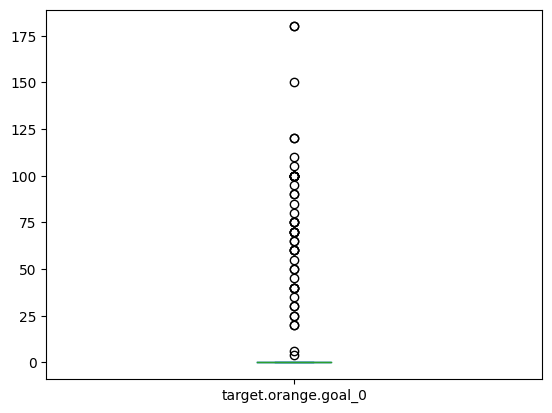

In [ ]:
final_data['target.orange.goal_0'].plot.box()

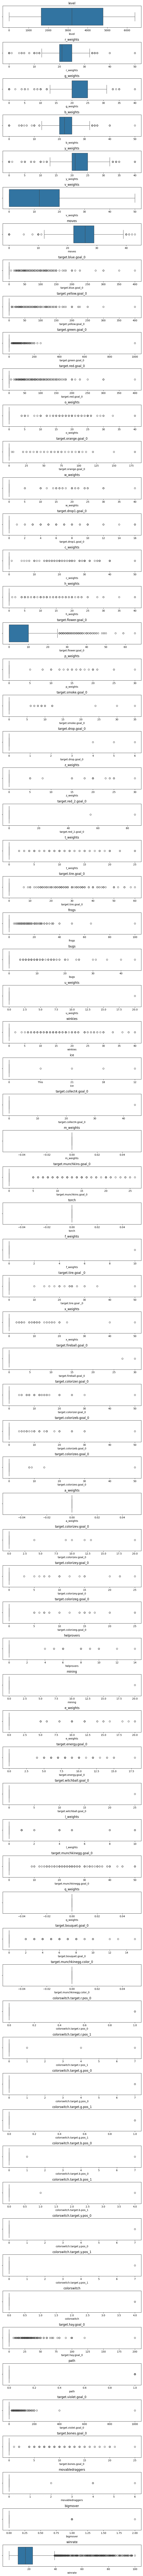

In [ ]:
# prompt: box plot the final_data.columns in  row and  column

# Assuming final_data is your DataFrame

# Create a figure and axes
fig, axes = plt.subplots(nrows=len(final_data.columns), ncols=1, figsize=(8, 2 * len(final_data.columns)))

# Iterate through columns and create box plots
for i, column in enumerate(final_data.columns):
    sns.boxplot(x=final_data[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# prompt: box plot in 3 row 3 column

# # Assuming you have a DataFrame named 'final_data'

# # Create a figure and axes with 3 rows and 3 columns
# fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# # Iterate through the columns and create box plots
# for i, col in enumerate(final_data.columns[2:11]):  # Adjust the range as needed
#   row = i // 3
#   col_index = i % 3
#   sns.boxplot(x=final_data[col], ax=axes[row, col_index])
#   axes[row, col_index].set_title(col)

# plt.tight_layout()
# plt.show()

In [ ]:
att_req_columns =['target.green.goal_0','target.drop.goal_0','target.red_2.goal_0','u_weights','ice','target.collect4.goal_0','m_weights','torch',
'f_weights','target.fireball.goal_0','target.colorizer.goal_0','a_weights','mining','target.witchball.goal_0','q_weights','target.munchkinegg.color_0',
'colorswitch.target.g.pos_1', 'target.munchkinegg.color_0', 'colorswitch.target.r.pos_0',
 'colorswitch.target.r.pos_1', 'colorswitch.target.g.pos_0','colorswitch.target.g.pos_1', 'colorswitch.target.b.pos_0',
  'colorswitch.target.b.pos_1', 'colorswitch.target.y.pos_0','colorswitch.target.y.pos_1', 'colorswitch','target.hay.goal_0',
   'path', 'target.violet.goal_0', 'movabledraggers', 'bigmover']


In [ ]:
for col in att_req_columns:
  print(col, final_data[col].unique())


target.green.goal_0 [   0   20   50   60   40   80   35   45   30   22  150   75   70  100
   55   25   95 1000   65  165  200   85  115  125   90  140  170  160
  225  190  130  120  110  180  250  135  145   99   44   38]
target.drop.goal_0 [0 6 5 4]
target.red_2.goal_0 [ 0 85 55]
u_weights [ 0 20]
ice ['0' 'This' '21' '18' '12']
target.collect4.goal_0 [ 0 44]
m_weights [0]
torch [0]
f_weights [ 0 10]
target.fireball.goal_0 [ 0 30 27]
target.colorizer.goal_0 [ 0 14 12 20 50 10 30 25  7  5 15  8  4 13 16]
a_weights [0]
mining [ 0 20]
target.witchball.goal_0 [ 0 25]
q_weights [0]
target.munchkinegg.color_0 [0]
colorswitch.target.g.pos_1 [0 1]
target.munchkinegg.color_0 [0]
colorswitch.target.r.pos_0 [0 1]
colorswitch.target.r.pos_1 [0 1 7 4]
colorswitch.target.g.pos_0 [0 7]
colorswitch.target.g.pos_1 [0 1]
colorswitch.target.b.pos_0 [0 1 7]
colorswitch.target.b.pos_1 [0 1 4]
colorswitch.target.y.pos_0 [0 7]
colorswitch.target.y.pos_1 [0 7]
colorswitch [0 4]
target.hay.goal_0 [  0  27  

In [ ]:
final_data['target.green.goal_0'] = np.where(final_data['target.green.goal_0'] > 400, 400, final_data['target.green.goal_0'])
final_data['target.green.goal_0'].unique()

array([  0,  20,  50,  60,  40,  80,  35,  45,  30,  22, 150,  75,  70,
       100,  55,  25,  95, 400,  65, 165, 200,  85, 115, 125,  90, 140,
       170, 160, 225, 190, 130, 120, 110, 180, 250, 135, 145,  99,  44,
        38])

In [ ]:
final_data.head()


,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,...,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover,winrate
0,2,24,23,30,23,0,10,16,0,0,...,0,0,0,0,0,0,0,0,0,94.18
1,3,20,20,20,40,0,10,0,13,0,...,0,0,0,0,0,0,0,0,0,97.67
2,4,18,30,18,17,17,10,0,0,20,...,0,0,0,0,0,0,0,0,0,95.32
3,5,18,18,18,28,18,10,0,21,0,...,0,0,0,0,0,0,0,0,0,96.84
4,6,22,20,21,20,21,20,0,0,0,...,0,0,0,0,0,0,0,0,0,92.93


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.3 which is incompatible.
sktime 0.26.0 requires pandas<2.2.0,>=1.1, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# prompt: save csv file in goolge colab

# ... (Your existing code) ...

# Save the DataFrame to a CSV file in Google Colab
final_data.to_csv('/content/drive/MyDrive/Colab Notebooks/winrate/final_data_no_gameboard.csv', index=False, mode='w')

# # Download the CSV file to your local machine
# from google.colab import files
# files.download('final_data_no_gameboard.csv')

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
# prompt: Save to gdrive final_data.to_csv('/content/drive/MyDrive/final_data_no_gameboard.csv')

final_data.to_csv('/content/drive/MyDrive/final_data_no_gameboard.csv')

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
final_data.to_csv('/content/drive/MyDrive/final_data_no_gameboard.csv')

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
# prompt: export to csv from final_data file

final_data.to_csv('final_data_exported.csv', index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
np.random.seed(0)
train_lvls, test_lvls = train_test_split(final_data, train_size = 0.8,
                                                       test_size = 0.2, random_state = 42)

In [ ]:
from pycaret.regression import setup, compare_models, predict_model

# Set up the PyCaret regression environment
regression_setup = setup(train_lvls, target='winrate',
                         session_id=123,
                         normalize=True)

,Description,Value
0,Session id,123
1,Target,winrate
2,Target type,Regression
3,Original data shape,"(4682, 71)"
4,Transformed data shape,"(4682, 73)"
5,Transformed train set shape,"(3277, 73)"
6,Transformed test set shape,"(1405, 73)"
7,Numeric features,69
8,Categorical features,1
9,Preprocess,True


In [ ]:
# Compare models and select the best
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7.6583,121.5699,11.0045,0.2604,0.4759,0.4907,0.6790
lightgbm,Light Gradient Boosting Machine,7.7999,123.3730,11.0862,0.2489,0.4826,0.4927,0.8640
rf,Random Forest Regressor,7.7830,124.2386,11.1320,0.2405,0.4842,0.4978,4.0870
et,Extra Trees Regressor,7.8755,130.4493,11.4100,0.2006,0.4937,0.4999,2.9690
xgboost,Extreme Gradient Boosting,8.0020,135.3998,11.6236,0.1708,0.4989,0.5034,0.5260
br,Bayesian Ridge,8.3283,152.1522,12.2946,0.0820,0.5103,0.5315,0.1830
ridge,Ridge Regression,8.4052,153.3135,12.3426,0.0742,0.5142,0.5346,0.1120
ada,AdaBoost Regressor,9.2131,152.7343,12.3318,0.0711,0.5576,0.6665,0.6610
en,Elastic Net,8.2796,154.2700,12.3751,0.0710,0.5108,0.5339,0.1130
omp,Orthogonal Matching Pursuit,8.4331,156.4303,12.4566,0.0588,0.5149,0.5393,0.2130


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
from pycaret.regression import predict_model
# Predict on the original dataset
(predict_model(best_model, test_lvls))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.3671,224.9711,14.9990,-0.0555,0.5564,0.5530


,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,...,colorswitch.target.y.pos_1,colorswitch,target.hay.goal_0,path,target.violet.goal_0,target.bones.goal_0,movabledraggers,bigmover,winrate,prediction_label
4690,4692,25,25,25,25,0,31,0,0,0,...,0,0,0,0,0,0,0,0,9.420000,19.698511
3141,3143,23,23,23,23,8,24,0,0,0,...,0,0,0,0,0,0,0,0,10.810000,18.292633
3265,3267,10,10,10,10,10,27,0,0,0,...,0,0,0,0,0,0,0,0,16.430000,18.832021
26,28,20,20,20,20,20,25,0,0,0,...,0,0,0,0,0,0,0,0,63.049999,19.847564
1213,1215,20,20,20,20,20,26,150,0,0,...,0,0,0,0,0,0,0,0,10.040000,16.327689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,5412,25,25,25,25,0,27,0,0,0,...,0,0,0,0,0,0,0,0,9.690000,22.085097
3771,3773,20,20,20,20,20,30,0,0,0,...,0,0,0,0,0,10,0,0,22.799999,20.056123
3776,3778,20,20,20,20,20,36,0,0,0,...,0,0,0,0,0,12,0,0,21.469999,17.075354
5792,5794,25,0,25,25,0,35,0,0,0,...,0,0,0,0,0,0,0,0,33.049999,16.754787


In [ ]:
from pycaret.regression import finalize_model

# Finalize the model
final_best_model = finalize_model(best_model)

In [ ]:
from pycaret.regression import save_model

# Save the finalized model
save_model(final_best_model, 'best_lvls_model')

In [ ]:
from pycaret.regression import load_model

# Load the saved model
final_best_model = load_model('best_lvls_model')


In [ ]:
from pycaret.regression import predict_model

# Predict on the original dataset
predictions = predict_model(final_best_model)

# Show the predictions
print(predictions[['p3_winrate']])

In [ ]:
# prompt: merge 2 columns with same name in df

# # Find columns with duplicate names
# duplicate_columns = lvls_df.columns[lvls_df.columns.duplicated(keep=False)]

# # If there are duplicate columns
# if len(duplicate_columns) > 0:
#   # Group by column name and aggregate using a suitable method (e.g., mean, sum, first)
#   lvls_df = lvls_df.groupby(level=0, axis=1).sum()

#   # Alternatively, you can use a custom aggregation function if needed:
#   # def custom_agg(x):
#   #     return x.iloc[0]  # Keep the first value for each duplicated column
#   # lvls_df = lvls_df.groupby(level=0, axis=1).agg(custom_agg)

# print(lvls_df.head())
# duplicate_columns = lvls_df.columns[lvls_df.columns.duplicated(keep=False)]
# duplicate_columns

In [ ]:
win_rate_csv ='/content/drive/MyDrive/Colab Notebooks/winrate/Winrate_R93_17Oct2024 - Sheet1.csv'

winrate_df = pd.read_csv(win_rate_csv, index_col=0)

winrate_df = winrate_df[winrate_df.index>1]

winrate_df['level'] = winrate_df.index

winrate_df = winrate_df.reset_index(drop=True)

columns_win_lower = winrate_df.columns.map(lambda x: x.lower())

winrate_df.columns = columns_win_lower

winrate_df.head()

,winrate,in range?,low range,high range,level
0,94.18,In Range,70,100,2.0
1,97.67,In Range,70,100,3.0
2,95.32,In Range,70,100,4.0
3,96.84,In Range,70,100,5.0
4,92.93,In Range,70,100,6.0


In [ ]:
# prompt: merge winrate_df with lvls_df where key is level

merged_df = pd.merge(lvls_df, winrate_df, on='level', how='inner')

merged_df.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,score,#target.yellow.goal_0,target.violet.goal_0,h_weights,target.hay.goal_0,target.flower.goal_0,p_weights,# target.green.goal_0,target.smoke.goal_0,target.drop.goal_0,z_weights,target.bones.goal_0,target.red_2.goal_0,target.bones.goal_0,t_weights,target.tire.goal_0,target.hay.goal_0,frogs,bugs,target.violet.goal_0,#target.green.goal_0,u_weights,winkies,#target.red.goal_0,path,#target.bones.goal_0,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,movabledraggers,#target.flower.goal_0,target.hay.goal _0,target.tire.goal _0,bigmover,#target.hay.goal_0,x_weights,movabledraggers,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,bigmover,target.witchball.goal_0,#target.energy.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,_weights,bigmover,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,winrate,in range?,low range,high range
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18,In Range,70,100
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67,In Range,70,100
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32,In Range,70,100
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84,In Range,70,100
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93,In Range,70,100


In [ ]:
columns_lower

Index(['level', 'r_weights', 'g_weights', 'b_weights', 'y_weights',
       'v_weights', 'moves', 'target.blue.goal_0', 'target.yellow.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'score', '#target.yellow.goal_0', 'target.violet.goal_0', 'h_weights',
       'target.hay.goal_0', 'target.flower.goal_0', 'p_weights',
       '# target.green.goal_0', 'target.smoke.goal_0', 'target.drop.goal_0',
       'z_weights', 'target.bones.goal_0', 'target.red_2.goal_0',
       'target.bones.goal_0', 't_weights', 'target.tire.goal_0',
       'target.hay.goal_0', 'frogs', 'bugs', 'target.violet.goal_0',
       '#target.green.goal_0', 'u_weights', 'winkies', '#target.red.goal_0',
       'path', '#target.bones.goal_0', 'ice', 'target.collect4.goal_0',
       'm_weights', 'target.munchkins.goal_0', 'torch', 'f_weights',
       'movabledraggers', '#target.flower.goal_0', 'target.hay.goal _0',
  

In [ ]:
columns_to_remove = ['#target.yellow.goal_0','score','# target.green.goal_0','#target.green.goal_0','#target.red.goal_0','#target.flower.goal_0',
 '#target.bones.goal_0','#target.hay.goal_0','#target.energy.goal_0',' _weights'] # Replace with the actual column names you want to remove

merged_df = merged_df.drop(columns=columns_to_remove)

merged_df.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,target.violet.goal_0,h_weights,target.hay.goal_0,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.bones.goal_0,target.red_2.goal_0,target.bones.goal_0,t_weights,target.tire.goal_0,target.hay.goal_0,frogs,bugs,target.violet.goal_0,u_weights,winkies,path,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,movabledraggers,#target.flower.goal_0,target.hay.goal _0,target.tire.goal _0,bigmover,x_weights,movabledraggers,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,bigmover,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,bigmover,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,winrate,in range?,low range,high range
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18,In Range,70,100
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67,In Range,70,100
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32,In Range,70,100
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84,In Range,70,100
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93,In Range,70,100


In [ ]:
merged_df.shape

(6399, 82)

In [ ]:
merged_df = merged_df[merged_df['in range?'] == 'In Range']

merged_df.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,target.violet.goal_0,h_weights,target.hay.goal_0,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.bones.goal_0,target.red_2.goal_0,target.bones.goal_0,t_weights,target.tire.goal_0,target.hay.goal_0,frogs,bugs,target.violet.goal_0,u_weights,winkies,path,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,movabledraggers,#target.flower.goal_0,target.hay.goal _0,target.tire.goal _0,bigmover,x_weights,movabledraggers,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,bigmover,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,bigmover,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,winrate,in range?,low range,high range
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18,In Range,70,100
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67,In Range,70,100
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32,In Range,70,100
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84,In Range,70,100
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93,In Range,70,100


In [ ]:
merged_df.shape

(5853, 82)

In [ ]:
remove_col = ['in range?','low range','high range']
merged_df = merged_df.drop(columns =remove_col)
merged_df.head()

,level,r_weights,g_weights,b_weights,y_weights,v_weights,moves,target.blue.goal_0,target.yellow.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,target.violet.goal_0,h_weights,target.hay.goal_0,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.bones.goal_0,target.red_2.goal_0,target.bones.goal_0,t_weights,target.tire.goal_0,target.hay.goal_0,frogs,bugs,target.violet.goal_0,u_weights,winkies,path,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,movabledraggers,#target.flower.goal_0,target.hay.goal _0,target.tire.goal _0,bigmover,x_weights,movabledraggers,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,bigmover,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,bigmover,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch,winrate
0,2,24,23,30,23,0,10,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18
1,3,20,20,20,40,0,10,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67
2,4,18,30,18,17,17,10,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32
3,5,18,18,18,28,18,10,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84
4,6,22,20,21,20,21,20,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.93


In [ ]:
merged_df.columns.map(lambda x: x.lower())

Index(['level', 'r_weights', 'g_weights', 'b_weights', 'y_weights',
       'v_weights', 'moves', 'target.blue.goal_0', 'target.yellow.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'target.violet.goal_0', 'h_weights', 'target.hay.goal_0',
       'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'target.drop.goal_0', 'z_weights', 'target.bones.goal_0',
       'target.red_2.goal_0', 'target.bones.goal_0', 't_weights',
       'target.tire.goal_0', 'target.hay.goal_0', 'frogs', 'bugs',
       'target.violet.goal_0', 'u_weights', 'winkies', 'path', 'ice',
       'target.collect4.goal_0', 'm_weights', 'target.munchkins.goal_0',
       'torch', 'f_weights', 'movabledraggers', '#target.flower.goal_0',
       'target.hay.goal _0', 'target.tire.goal _0', 'bigmover', 'x_weights',
       'movabledraggers', 'target.fireball.goal_0', 'target.colorizer.goal_0',
       'tar

In [ ]:
np.random.seed(0)
train_lvls, test_lvls = train_test_split(merged_df, train_size = 0.8,
                                                       test_size = 0.2, random_state = 42)


In [ ]:
# prompt: find duplivate columns in train_lvls dataframe

# dup_cols = []
# for i in range(train_lvls.shape[1]):
#   col1 = train_lvls.iloc[:,i]
#   for j in range(i + 1, train_lvls.shape[1]):
#     col2 = train_lvls.iloc[:,j]
#     if col1.equals(col2):
#       dup_cols.append(train_lvls.columns[i])
#       break

# print("Duplicate columns are:", dup_cols)

Duplicate columns are: ['target.hay.goal_0', 'path', 'm_weights', 'torch', 'f_weights', 'target.fireball.goal_0', 'a_weights', 'q_weights', 'target.munchkinegg.color_0', 'colorswitch.target.y.pos_0']


In [ ]:
train_lvls.columns

Index(['level', 'r_weights', 'g_weights', 'b_weights', 'y_weights',
       'v_weights', 'moves', 'target.blue.goal_0', 'target.yellow.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'target.violet.goal_0', 'h_weights', 'target.hay.goal_0',
       'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'target.drop.goal_0', 'z_weights', 'target.bones.goal_0',
       'target.red_2.goal_0', 'target.bones.goal_0', 't_weights',
       'target.tire.goal_0', 'target.hay.goal_0', 'frogs', 'bugs',
       'target.violet.goal_0', 'u_weights', 'winkies', 'path', 'ice',
       'target.collect4.goal_0', 'm_weights', 'target.munchkins.goal_0',
       'torch', 'f_weights', 'movabledraggers', '#target.flower.goal_0',
       'target.hay.goal _0', 'target.tire.goal _0', 'bigmover', 'x_weights',
       'movabledraggers', 'target.fireball.goal_0', 'target.colorizer.goal_0',
       'tar

,target.hay.goal_0,target.hay.goal_0
5384,0,0
6321,0,0
6263,0,0
4829,0,0
164,11,0
...,...,...
4088,0,0
5676,0,0
5720,0,0
5905,0,0


In [ ]:
from pycaret.regression import setup, compare_models

# Set up the PyCaret regression environment
regression_setup = setup(train_lvls, target='winrate',
                         session_id=123,
                         normalize=True)

ValueError: Duplicate column names found in X.

In [ ]:
best_model = compare_models()# from pycaret.regression import setup, compare_models